In [1]:
using Test

In [2]:
using Plots
using Printf

In [3]:
using Unitful

In [4]:
using DataFrames

In [5]:
using CSV

In [6]:
import Unitful:
    nm, μm, mm, cm, m, km,
    mg, g, kg,
    ps, ns, μs, ms, s, minute, hr, d, yr, Hz, kHz, MHz, GHz,
    eV,
    μJ, mJ, J,
	μW, mW, W

In [7]:
include("../src/LaserLab.jl")

Main.LaserLab

## Test dffunctions


	load_df_from_csv(path::String, fname::String, csvg::CsvG)

Load a dataframe from a csv file.

### Arguments
- `path::String`: a path to the data.
- `fname::String`: name of the (csv) file expressing the df.


In [8]:
spG = LaserLab.CsvG(';',',')  # spanish: decimals represented with ',' delimited with ';'
enG = LaserLab.CsvG(',','.')  # english
df = LaserLab.load_df_from_csv("/Users/jj/JuliaProjects/LaserLab/data/objectives", "LMU-40X-NUV.csv", enG)

,Wavelength(µm),Transmission(%)
,Float64,Float64
1,200.0,4.1
2,220.0,8.19
3,240.0,15.84
4,260.0,29.73
5,280.0,51.93
6,300.0,78.21
7,320.0,90.59
8,340.0,92.39
9,360.0,92.13


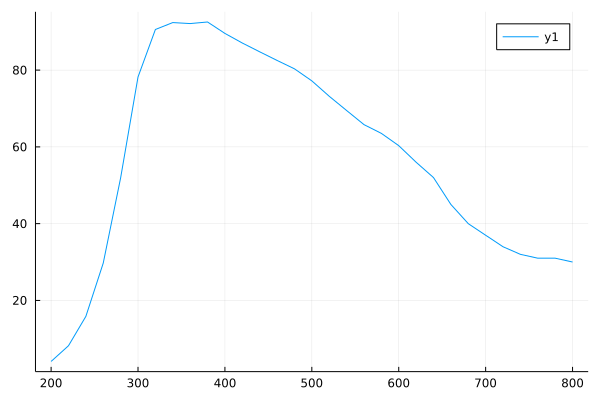

In [9]:
plot(df[!, "Wavelength(µm)"], df[!, "Transmission(%)"])

	dftof(wl, df::DataFrame, cname::String,
			   bkgnd::Float64=0.0)

Return an interpolated function, valid in range wl.

### Arguments
- `wl`::interpolation range.
- `df::DataFrame`: data frame holding the data.
- `cname::String`: name of the column holding data to be interplated.
- `overflow::Real`: value of the data outside interpolation range.

In [10]:
wl=200.0:20:800.0
fdf =LaserLab.dftof(wl, df, "Transmission(%)")

(::Main.LaserLab.var"#fn#1"{Interpolations.Extrapolation{Float64, 1, Interpolations.ScaledInterpolation{Float64, 1, Interpolations.BSplineInterpolation{Float64, 1, Vector{Float64}, Interpolations.BSpline{Interpolations.Linear{Interpolations.Throw{Interpolations.OnGrid}}}, Tuple{Base.OneTo{Int64}}}, Interpolations.BSpline{Interpolations.Linear{Interpolations.Throw{Interpolations.OnGrid}}}, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}}, Interpolations.BSpline{Interpolations.Linear{Interpolations.Throw{Interpolations.OnGrid}}}, Interpolations.Throw{Nothing}}, Float64, Float64, Float64, Float64}) (generic function with 1 method)

In [11]:
@test all([fdf(df[1,"Wavelength(µm)"]) == df[1,"Transmission(%)"] for i in 1:31])

Test Passed

	qpdf(f, λmin::Real, λmax::Real)

Return the integral of f in the interval (λmin, λmax)
(Syntactic sugar for quadgk)

### Arguments
- `f::Function`: Function to be integrated.
- `λmin::Number`: lower bound of range.
- `λmax::Number`: upper bound of range.

In [12]:
total_area = LaserLab.qpdf(fdf, 200.0, 800.0)
green_area = LaserLab.qpdf(fdf, 400.0, 600.0)
red_area = LaserLab.qpdf(fdf, 600.0, 800.0)
@printf("r_g = %5.2f r_r = %5.2f, r_g/r_r = %5.2f ", green_area/total_area, red_area/total_area, green_area/red_area )

r_g =  0.43 r_r =  0.23, r_g/r_r =  1.88 

In [13]:
@test isapprox(green_area/red_area, 1.88, rtol=0.01) 

Test Passed


	ftopdf(wl, f)

Compute the PDF of function f in range wl.

### Arguments
- `wl`: Range of application.
- `f::Function`: Input function.


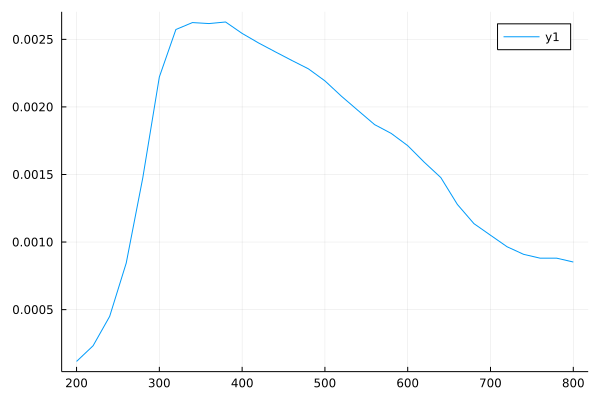

In [14]:
N, dfpdf = LaserLab.ftopdf(wl, fdf)
plot(wl, dfpdf.(wl))


In [15]:
@test total_area ≈ N 

Test Passed